In [8]:
import random
from itertools import count
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import r

#Global Variables Affecting Simulation
boardSIZE = 10
infectionRadius = 1     #Radius of potential infection
steps = 20              #Steps until death or recovery chance
deathchance = 10        #Percent chance of death
recoverychance = 90     #Percent chance of recovery
resilience = 0 #Used to determine potential chance of infection
SocDist = 50             #Allowed amount of steps for social distancing
numOfPeople = 20       #Population of people on grid
grid=[]                 #List to make grid matrix
people=[]               #List to hold person objects
numInfected = 1         #Counter for number of infected people
numImmune = 0           #Counter for number of immune people
numDead = 0             #Counter for number of total dead 
numDeadatStep = 0       #Counter for number of dead per step of simulation
numRecoveredatStep = 0  #Counter for number of recovered per step of simulation

ModuleNotFoundError: No module named 'r'

In [9]:
class Person(object):
    def __init__(self,x_,y_,id_,infected_):
        self.startx = x_            #Starting X Coordinate for social distancing
        self.starty = y_            #Starting Y Coordinate for social distancing
        self.dY = 0                 #Distance from Starting Y
        self.dX = 0                 #Distance from Starting X
        self.x=x_                   #Current X position on grid
        self.y=y_                   #Current Y position on grid
        self.id=id_                 #ID of person
        self.infected=infected_     #Infected flag
        self.immune=False           #Immunity flag
        self.timeSinceInfection=0   #Time elapsed since infected
        self.dead=False             #Death flag
        
    def __str__(self):
        if self.infected == True:
            return "I"
        else:
            return "S"

    def chkSocDist(self,x,y):
        """
        Function the evaluates the social distancing parameter of Person
        Based on Starting position during first intialization of grid

        Works by preventing the person from traveling too many squares in
        the X or Y direction away from their 'Home' 

        ------
        Returns False if to far from home to prevent movement

        Otherwise Returns true to allow for movement

        ------

        Social Distancing measure can work for both healthy and infected 
        """
        if ((x+self.dX > SocDist) or (y+self.dY > SocDist)):
            return False
        else:
            return True

    def step(self, grid_):
        """
        Purpose is to generate random movement of the people inside grid

        Self used to denote the person object, grid being the map of people positions
        and movements possible
        """
        if self.dead == True:
            return
        if self.infected == True:
            self.timeSinceInfection+=1

        #get direction up down left right and move if it is open.
        # 0 = up 1 = down 2=left 3=right
        dirs = [0,1,2,3]
        random.shuffle(dirs) #Movement directions randomized for random movement
        for i in dirs:
            if i == 0:
                if (self.y-1 > 0) and (grid_[self.x][self.y-1] == 0) and (self.chkSocDist(0,-1)):
                    grid_[self.x][self.y] = 0   #Current square of person set to 0 after once they've moved
                    self.y -= 1
                    self.dY -= 1                #Updating distance from starting Y
                    grid_[self.x][self.y] = self #Updating grid to contain person
                    break
            elif i == 1:
                if (self.y+1 < boardSIZE-1) and (grid_[self.x][self.y+1] == 0) and (self.chkSocDist(0,1)):
                    grid_[self.x][self.y] = 0 #Current square of person set to 0 after once they've moved
                    self.y += 1
                    self.dY += 1                #Updating distance from starting Y
                    grid_[self.x][self.y] = self #Updating grid to contain person
                    break
            elif i == 2:
                if  (self.x-1 > 0) and (grid_[self.x-1][self.y] == 0) and (self.chkSocDist(-1,0)):
                    grid_[self.x][self.y] = 0 #Current square of person set to 0 after once they've moved
                    self.x -= 1
                    self.dX -= 1                #Updating distance from starting X
                    grid_[self.x][self.y] = self #Updating grid to contain person
                    break
            elif i == 3:
                if (self.x+1 < boardSIZE-1) and (grid_[self.x+1][self.y] == 0) and (self.chkSocDist(1,0)):
                    grid_[self.x][self.y] = 0 #Current square of person set to 0 after once they've moved
                    self.x += 1
                    self.dX += 1                #Updating distance from starting X
                    grid_[self.x][self.y] = self #Updating grid to contain person
                    break
            #put code for checking virus either here or down below after all people have moved.

    def updateInfected(self, grid_):
        dirs = [0,1,2,3,4,5,6,7]
        #get direction up down left right and move if it is open.
        # 0 = up 1 = down 2=left 3=right
        global infectionRadius
        global numInfected
        global resilience
        
        if self.infected == False:
            return
        for i in dirs:
            for j in range(1,infectionRadius+1):
                if i == 0:
                    if (self.y-j > 0) and (grid_[self.x][self.y-j] != 0) and (grid_[self.x][self.y-j].infected == False):
                        if(resilience < random.randrange(100)):
                            grid_[self.x][self.y-j].infected=True
                            numInfected+=1
                        break
                elif i == 1:
                    if (self.y+j < boardSIZE-1) and (grid_[self.x][self.y+j] != 0) and (grid_[self.x][self.y+j].infected == False):
                        if(resilience < random.randrange(100)):
                            grid_[self.x][self.y+j].infected=True
                            numInfected+=1
                        break
                elif i == 2:
                    if  (self.x-j > 0) and (grid_[self.x-j][self.y] != 0) and (grid_[self.x-j][self.y].infected == False):
                        if(resilience < random.randrange(100)):
                            grid_[self.x-j][self.y].infected=True
                            numInfected+=1
                        break
                elif i == 3:
                    if (self.x+j < boardSIZE-1) and (grid_[self.x+j][self.y] != 0) and (grid_[self.x+j][self.y].infected == False):
                        if(resilience < random.randrange(100)):
                            grid_[self.x+j][self.y].infected=True
                            numInfected+=1
                        break
                elif i == 4:
                    if (self.x+j < boardSIZE-1) and (self.y+j < boardSIZE-1) and (grid_[self.x+j][self.y+j] != 0) and (grid_[self.x+j][self.y+j].infected == False):
                        if(resilience < random.randrange(100)):
                            grid_[self.x+j][self.y+j].infected=True
                            numInfected+=1
                        break
                elif i == 5:
                    if (self.x+j < boardSIZE-1) and (self.y-j > 0) and (grid_[self.x+j][self.y-j] != 0) and (grid_[self.x+j][self.y-j].infected == False):
                        if(resilience < random.randrange(100)):
                            grid_[self.x+j][self.y-j].infected=True
                            numInfected+=1
                        break
                elif i == 6:
                    if (self.x-j > 0)and (self.y+j < boardSIZE-1) and (grid_[self.x-j][self.y+j] != 0) and (grid_[self.x-j][self.y+j].infected == False):
                        if(resilience < random.randrange(100)):
                            grid_[self.x-j][self.y+j].infected=True
                            numInfected+=1
                        break
                elif i == 7:
                    if (self.x-j > 0) and (self.y-j > 0) and (grid_[self.x-j][self.y-j] != 0) and (grid_[self.x-j][self.y-j].infected == False):
                        if(resilience < random.randrange(100)):
                            grid_[self.x-j][self.y-j].infected=True
                            numInfected+=1
                        break

    def liveOrDie(self, grid_,diechance,livechance):
        """
        Function determines whether and infected person in the grid recovers
        or dies from the infection based on predetermined chance percentages 
        """
        global numDead
        global numImmune
        global numInfected
        global numRecoveredatStep
        global numDeadatStep
        if self.infected == True and self.timeSinceInfection == steps:
            self.timeSinceInfection=0
            randnum = random.randrange(100)
            if randnum < livechance:
                self.immune = True
                self.infected = False
                numInfected-=1
                numImmune+=1
                numRecoveredatStep+=1
            else:
                self.infected = False
                self.dead = True
                grid_[self.x][self.y] = 0
                numInfected-=1
                numDead+=1
                numDeadatStep+=1






In [10]:
def initSim():
    # 2D array 
    rows, cols = (boardSIZE, boardSIZE)
    global grid
    global people
    grid = [[0 for i in range(cols)] for j in range(rows)] 
##print(grid)
    for i in range(numOfPeople):
        tempx = 0
        tempy = 0
        while True:
            tempx = random.randrange(0,boardSIZE)
            tempy = random.randrange(0,boardSIZE)
            if grid[tempx][tempy] == 0:
                break
    
        people.append(Person(tempx,tempy,i,False))
        grid[tempx][tempy] = people[i]
    people[random.randrange(0,len(people)-1)].infected = True
    #for p in grid:
        #for element in p:
           ##print(element, end=' ')
        ##print()

def resetVars():
    global grid
    global people
    global numInfected
    global numImmune
    global numDead
    global numDeadatStep
    global numRecoveredatStep
    grid = []
    people = []
    numInfected = 1
    numImmune = 0
    numDead = 0
    numDeadatStep = 0
    numRecoveredatStep = 0

In [11]:
def runSim(mode,list1,list2,list3 =[],list4=[],list5=[],list6=[],death=0,recovery=0):
    """
    runSim main functionality is running a random simulation of infection
    with certain givens, being population size, grid size, number of infected,
    death chance percent, and recovery chance percent. 

    *Lists 3-6 Only Used 

    mode:     Determines whether running the Basic Simulation for Part A
              Or Other Customized parameters for later parts that may affect infection.
    List 1:   Is the list containing the total average or newly infected at each step
    List 2:   Is the list containing the total average of already infected
    List 3:   List of Lists Average Recovered
    List 4:   List of Lists Average Dead
    List 5:   List of Lists # Average Dead per step of simulation
    List 6:   List of Lists # Average Recovered per step of simulation 
    Death:    Represents percent chance of death from infection
    Recovery: Represents percent change of recovery from infection

    """
    resetVars()
    newInfected=[]
    alreadyInfected=[] 
    newRecovered = []
    newDead = []
    alreadyDead = []
    alreadyRecovered = []
    initSim()
    timestep = 0
    newInfected.append(0)
    alreadyInfected.append(1)
    newRecovered.append(0)
    newDead.append(0)
    alreadyDead.append(0)
    alreadyRecovered.append(0)
     
     #mode1 is part A, else is other modes for now
    if mode == 1:
        while numInfected < numOfPeople:
            numInfect = numInfected
            for i in people:
                i.step(grid)
            for i in people:
                i.updateInfected(grid)
            timestep+=1
            newInfected.append(numInfected-numInfect)
            alreadyInfected.append(numInfect)
    else:
        while numInfected > 0:
            numRecov = numRecoveredatStep
            newDied = numDead
            for i in people:
                i.liveOrDie(grid,death,recovery)
            numInfect = numInfected

            for i in people:
                i.step(grid)
            for i in people:
                i.updateInfected(grid)
            timestep+=1
            newInfected.append(numInfected-numInfect) #Keeps Track of number infected at each step
            alreadyInfected.append(numInfect)   #Keeps Track of overall currently infected 
            newRecovered.append(numRecoveredatStep-numRecov)  #Keeps track of recovered at each step
            newDead.append(numDead-newDied)     #keeps track of # dead at each step
            alreadyDead.append(numDead)
            alreadyRecovered.append(numRecov)



    ##print(timestep)
    list1.append(newInfected)
    list2.append(alreadyInfected)


    if (mode > 1):
        list3.append(alreadyRecovered)
        list4.append(alreadyDead)
        list5.append(newDead)
        list6.append(newRecovered)
    """for p in grid:
        for element in p:
            #print(element, end=' ')
        #print()    
    #print()"""
    resetVars()



In [12]:
totalAvgAlreadyInfected =[] 
totalAvgNewInfected =[] 
totalAvgRecover = []
totalAvgDie = []
totDeadPerStep = []
totRecoverPerStep = []

dfRecoveredAvg = pd.DataFrame()
dfAvgDead = pd.DataFrame()
dfDeadPerStep = pd.DataFrame()
dfRecoveredPerStep = pd.DataFrame()

def resetDfs():
    global totalAvgAlreadyInfected
    global totalAvgNewInfected 
    global totalAvgRecover 
    global totalAvgDie 
    global totDeadPerStep 
    global totRecoverPerStep 
    global dfRecoveredAvg 
    global dfAvgDead 
    global dfDeadPerStep 
    global dfRecoveredPerStep 
    totalAvgAlreadyInfected =[] 
    totalAvgNewInfected =[] 
    totalAvgRecover = []
    totalAvgDie = []
    totDeadPerStep = []
    totRecoverPerStep = []
    dfRecoveredAvg = pd.DataFrame()
    dfAvgDead = pd.DataFrame()
    dfDeadPerStep = pd.DataFrame()
    dfRecoveredPerStep = pd.DataFrame()



partAGotInfected = pd.DataFrame()
partAAlreadyInfected = pd.DataFrame()


In [13]:
#----------------------PART A-----------------------

#Simulation 1 Iteration
resetDfs()
for i in range(1):
    runSim(1,totalAvgNewInfected,totalAvgAlreadyInfected)

tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
partAGotInfected["Avg 1"] = tempDF2.mean(axis = 0)
partAAlreadyInfected["Avg 1"] = tempDF.mean(axis = 0)

#Simulation 10 Iterations
resetDfs()
totalAvgAlreadyInfected =[] 
totalAvgNewInfected =[] 
for i in range(10):
    runSim(1,totalAvgNewInfected,totalAvgAlreadyInfected)

tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
partAGotInfected["Avg 10"] = tempDF2.mean(axis = 0)
partAAlreadyInfected["Avg 10"] = tempDF.mean(axis = 0)


#Simulation 100 Iterations
resetDfs()
totalAvgAlreadyInfected =[] 
totalAvgNewInfected =[] 
for i in range(100):
    runSim(1,totalAvgNewInfected,totalAvgAlreadyInfected)

tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
partAGotInfected["Avg 100"] = tempDF2.mean(axis = 0)
partAAlreadyInfected["Avg 100"] = tempDF.mean(axis = 0)

#Simulation 1000 Iterations
resetDfs()

totalAvgAlreadyInfected =[] 
totalAvgNewInfected =[] 
for i in range(1000):
    runSim(1,totalAvgNewInfected,totalAvgAlreadyInfected)

tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
partAGotInfected["Avg 1000"] = tempDF2.mean(axis = 0)
partAAlreadyInfected["Avg 1000"] = tempDF.mean(axis = 0)

#print(partAGotInfected)
#print()
#print(partAAlreadyInfected)

In [14]:
#--------------------------PART B----------------------------
resetDfs()
#print("Part B")
#print()

partBGotInfected = pd.DataFrame()
partBAlreadyInfected = pd.DataFrame()
partBAvgRecovered = pd.DataFrame()
partBAvgDied = pd.DataFrame()
partBAvgDeadStep = pd.DataFrame()
partBAvgRecoveredStep = pd.DataFrame()

for i in range(1):
    runSim(2,totalAvgNewInfected,totalAvgAlreadyInfected,totalAvgRecover,totalAvgDie,totDeadPerStep,totRecoverPerStep,deathchance,recoverychance)

tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
tempDF3 = pd.DataFrame(totalAvgRecover)
tempDF4 = pd.DataFrame(totalAvgDie)
tempDF5 = pd.DataFrame(totDeadPerStep)
tempDF6 = pd.DataFrame(totRecoverPerStep)
partBGotInfected["Avg 1"] = tempDF2.mean(axis = 0)
partBAlreadyInfected["Avg 1"] = tempDF.mean(axis = 0)
partBAvgRecovered["Avg 1"] = tempDF3.mean(axis=0)
partBAvgDied["Avg 1"] = tempDF4.mean(axis=0)
partBAvgDeadStep["Avg 1"] = tempDF5.mean(axis=0)
partBAvgRecoveredStep["Avg 1"] = tempDF6.mean(axis=0)

resetDfs()
for i in range(10):
    runSim(2,totalAvgNewInfected,totalAvgAlreadyInfected,totalAvgRecover,totalAvgDie,totDeadPerStep,totRecoverPerStep,deathchance,recoverychance)

tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
tempDF3 = pd.DataFrame(totalAvgRecover)
tempDF4 = pd.DataFrame(totalAvgDie)
tempDF5 = pd.DataFrame(totDeadPerStep)
tempDF6 = pd.DataFrame(totRecoverPerStep)
partBGotInfected["Avg 10"] = tempDF2.mean(axis = 0)
partBAlreadyInfected["Avg 10"] = tempDF.mean(axis = 0)
partBAvgRecovered["Avg 10"] = tempDF3.mean(axis=0)
partBAvgDied["Avg 10"] = tempDF4.mean(axis=0)
partBAvgDeadStep["Avg 10"] = tempDF5.mean(axis=0)
partBAvgRecoveredStep["Avg 10"] = tempDF6.mean(axis=0)

resetDfs()
for i in range(100):
    runSim(2,totalAvgNewInfected,totalAvgAlreadyInfected,totalAvgRecover,totalAvgDie,totDeadPerStep,totRecoverPerStep,deathchance,recoverychance)

tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
tempDF3 = pd.DataFrame(totalAvgRecover)
tempDF4 = pd.DataFrame(totalAvgDie)
tempDF5 = pd.DataFrame(totDeadPerStep)
tempDF6 = pd.DataFrame(totRecoverPerStep)
partBGotInfected["Avg 100"] = tempDF2.mean(axis = 0)
partBAlreadyInfected["Avg 100"] = tempDF.mean(axis = 0)
partBAvgRecovered["Avg 100"] = tempDF3.mean(axis=0)
partBAvgDied["Avg 100"] = tempDF4.mean(axis=0)
partBAvgDeadStep["Avg 100"] = tempDF5.mean(axis=0)
partBAvgRecoveredStep["Avg 100"] = tempDF6.mean(axis=0)



resetDfs() 
for i in range(1000):
    runSim(2,totalAvgNewInfected,totalAvgAlreadyInfected,totalAvgRecover,totalAvgDie,totDeadPerStep,totRecoverPerStep,deathchance,recoverychance)

tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
tempDF3 = pd.DataFrame(totalAvgRecover)
tempDF4 = pd.DataFrame(totalAvgDie)
tempDF5 = pd.DataFrame(totDeadPerStep)
tempDF6 = pd.DataFrame(totRecoverPerStep)
partBGotInfected["Avg 1000"] = tempDF2.mean(axis = 0)
partBAlreadyInfected["Avg 1000"] = tempDF.mean(axis = 0)
partBAvgRecovered["Avg 1000"] = tempDF3.mean(axis=0)
partBAvgDied["Avg 1000"] = tempDF4.mean(axis=0)
partBAvgDeadStep["Avg 1000"] = tempDF5.mean(axis=0)
partBAvgRecoveredStep["Avg 1000"] = tempDF6.mean(axis=0)

#tempDF = pd.DataFrame()

##print("Got Infected")
#print(partBGotInfected)


##print("Already Infected")
#print()
##print(partBAlreadyInfected)

#Need to fix dataframe or redo AvgDied and AvgRecovered since graph formatting off


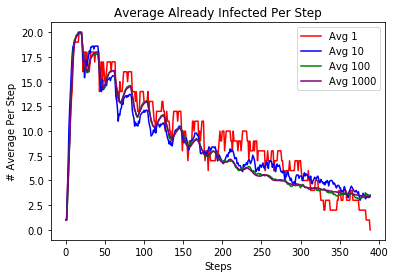

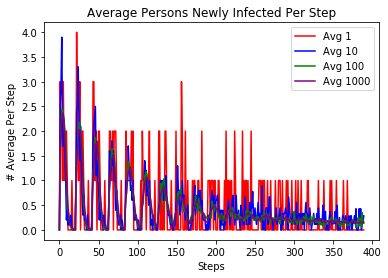

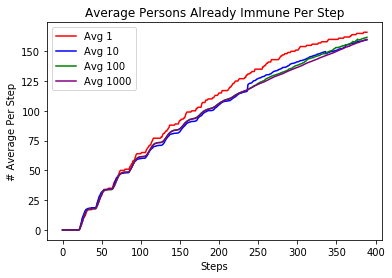

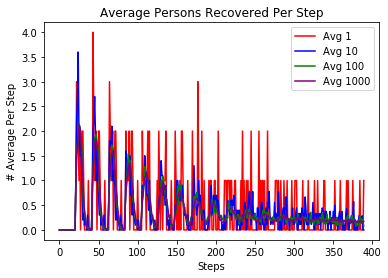

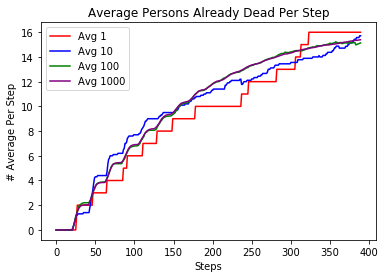

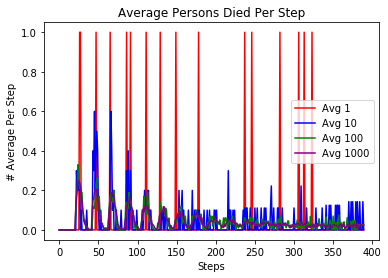

In [15]:
ax = plt.gca()
plt.title('Average Already Infected Per Step')
plt.xlabel('Steps')
plt.ylabel('# Average Per Step')
partBAlreadyInfected.plot(kind='line',y='Avg 1',color = 'red',ax=ax)
partBAlreadyInfected.plot(kind='line',y='Avg 10',color = 'blue',ax=ax)
partBAlreadyInfected.plot(kind='line',y='Avg 100',color = 'green',ax=ax)
partBAlreadyInfected.plot(kind='line',y='Avg 1000',color = 'purple',ax=ax)
plt.savefig('partBAlreadyInfected.png', transparent=True)

plt.show()

ax = plt.gca()
plt.title('Average Persons Newly Infected Per Step')
plt.xlabel('Steps')
plt.ylabel('# Average Per Step')
partBGotInfected.plot(kind='line',y='Avg 1',color = 'red', ax = ax)
partBGotInfected.plot(kind ='line',y='Avg 10',color = 'blue',ax = ax)
partBGotInfected.plot(kind='line',y='Avg 100', color='green',ax = ax)
partBGotInfected.plot(kind='line',y='Avg 1000',color = 'purple',ax = ax)
plt.savefig('partBGotInfected.png', transparent=True)
plt.show()

ax = plt.gca()
plt.title('Average Persons Already Immune Per Step')
plt.xlabel('Steps')
plt.ylabel('# Average Per Step')
partBAvgRecovered.plot(kind='line',y='Avg 1',color = 'red', ax = ax)
partBAvgRecovered.plot(kind ='line',y='Avg 10',color = 'blue',ax = ax)
partBAvgRecovered.plot(kind='line',y='Avg 100', color='green',ax = ax)
partBAvgRecovered.plot(kind='line',y='Avg 1000',color = 'purple',ax = ax)
plt.savefig('partBAvgRecovered.png', transparent=True)
plt.show()

ax = plt.gca()
#print(partBAvgRecovered)
plt.title('Average Persons Recovered Per Step')
plt.xlabel('Steps')
plt.ylabel('# Average Per Step')
partBAvgRecoveredStep.plot(kind='line',y='Avg 1',color = 'red',ax=ax)
partBAvgRecoveredStep.plot(kind='line',y='Avg 10',color = 'blue',ax=ax)
partBAvgRecoveredStep.plot(kind='line',y='Avg 100',color = 'green',ax=ax)
partBAvgRecoveredStep.plot(kind='line',y='Avg 1000',color = 'purple',ax=ax)
plt.savefig('partBAvgRecoveredStep.png', transparent=True)
plt.show()

ax = plt.gca()
plt.title('Average Persons Already Dead Per Step')
plt.xlabel('Steps')
plt.ylabel('# Average Per Step')
partBAvgDied.plot(kind='line',y='Avg 1',color = 'red', ax = ax)
partBAvgDied.plot(kind ='line',y='Avg 10',color = 'blue',ax = ax)
partBAvgDied.plot(kind='line',y='Avg 100', color='green',ax = ax)
partBAvgDied.plot(kind='line',y='Avg 1000',color = 'purple',ax = ax)
plt.savefig('partBAvgDied.png', transparent=True)
plt.show()

ax = plt.gca()
plt.title('Average Persons Died Per Step')
plt.xlabel('Steps')
plt.ylabel('# Average Per Step')
partBAvgDeadStep.plot(kind='line',y='Avg 1',color = 'red',ax=ax)
partBAvgDeadStep.plot(kind='line',y='Avg 10',color = 'blue',ax=ax)
partBAvgDeadStep.plot(kind='line',y='Avg 100',color = 'green',ax=ax)
partBAvgDeadStep.plot(kind='line',y='Avg 1000',color = 'purple',ax=ax)
plt.savefig('partBAvgDeadStep.png', transparent=True)
plt.show()


In [16]:
#--------------------------PART C ----------------------------
resetDfs()

#print("Part C")
#print()
steps=10
deathchance=50
recoverychance=50
infectionRadius=6

partCGotInfected = pd.DataFrame()
partCAlreadyInfected = pd.DataFrame()
partCAvgRecovered = pd.DataFrame()
partCAvgDied = pd.DataFrame()
partCAvgDeadStep = pd.DataFrame()
partCAvgRecoveredStep = pd.DataFrame()

for i in range(1):
    runSim(2,totalAvgNewInfected,totalAvgAlreadyInfected,totalAvgRecover,totalAvgDie,totDeadPerStep,totRecoverPerStep,deathchance,recoverychance)

tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
tempDF3 = pd.DataFrame(totalAvgRecover)
tempDF4 = pd.DataFrame(totalAvgDie)
tempDF5 = pd.DataFrame(totDeadPerStep)
tempDF6 = pd.DataFrame(totRecoverPerStep)
partCGotInfected["Avg 1"] = tempDF2.mean(axis = 0)
partCAlreadyInfected["Avg 1"] = tempDF.mean(axis = 0)
partCAvgRecovered["Avg 1"] = tempDF3.mean(axis=0)
partCAvgDied["Avg 1"] = tempDF4.mean(axis=0)
partCAvgDeadStep["Avg 1"] = tempDF5.mean(axis=0)
partCAvgRecoveredStep["Avg 1"] = tempDF6.mean(axis=0)

resetDfs()
for i in range(10):
    runSim(2,totalAvgNewInfected,totalAvgAlreadyInfected,totalAvgRecover,totalAvgDie,totDeadPerStep,totRecoverPerStep,deathchance,recoverychance)

tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
tempDF3 = pd.DataFrame(totalAvgRecover)
tempDF4 = pd.DataFrame(totalAvgDie)
tempDF5 = pd.DataFrame(totDeadPerStep)
tempDF6 = pd.DataFrame(totRecoverPerStep)
partCGotInfected["Avg 10"] = tempDF2.mean(axis = 0)
partCAlreadyInfected["Avg 10"] = tempDF.mean(axis = 0)
partCAvgRecovered["Avg 10"] = tempDF3.mean(axis=0)
partCAvgDied["Avg 10"] = tempDF4.mean(axis=0)
partCAvgDeadStep["Avg 10"] = tempDF5.mean(axis=0)
partCAvgRecoveredStep["Avg 10"] = tempDF6.mean(axis=0)

resetDfs()
for i in range(100):
    runSim(2,totalAvgNewInfected,totalAvgAlreadyInfected,totalAvgRecover,totalAvgDie,totDeadPerStep,totRecoverPerStep,deathchance,recoverychance)

tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
tempDF3 = pd.DataFrame(totalAvgRecover)
tempDF4 = pd.DataFrame(totalAvgDie)
tempDF5 = pd.DataFrame(totDeadPerStep)
tempDF6 = pd.DataFrame(totRecoverPerStep)
partCGotInfected["Avg 100"] = tempDF2.mean(axis = 0)
partCAlreadyInfected["Avg 100"] = tempDF.mean(axis = 0)
partCAvgRecovered["Avg 100"] = tempDF3.mean(axis=0)
partCAvgDied["Avg 100"] = tempDF4.mean(axis=0)
partCAvgDeadStep["Avg 100"] = tempDF5.mean(axis=0)
partCAvgRecoveredStep["Avg 100"] = tempDF6.mean(axis=0)



resetDfs() 
for i in range(1000):
    runSim(2,totalAvgNewInfected,totalAvgAlreadyInfected,totalAvgRecover,totalAvgDie,totDeadPerStep,totRecoverPerStep,deathchance,recoverychance)

tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
tempDF3 = pd.DataFrame(totalAvgRecover)
tempDF4 = pd.DataFrame(totalAvgDie)
tempDF5 = pd.DataFrame(totDeadPerStep)
tempDF6 = pd.DataFrame(totRecoverPerStep)
partCGotInfected["Avg 1000"] = tempDF2.mean(axis = 0)
partCAlreadyInfected["Avg 1000"] = tempDF.mean(axis = 0)
partCAvgRecovered["Avg 1000"] = tempDF3.mean(axis=0)
partCAvgDied["Avg 1000"] = tempDF4.mean(axis=0)
partCAvgDeadStep["Avg 1000"] = tempDF5.mean(axis=0)
partCAvgRecoveredStep["Avg 1000"] = tempDF6.mean(axis=0)    

#tempDF = pd.DataFrame()

##print("Got Infected")
#print(partCGotInfected)


##print("Already Infected")
#print()
##print(partCAlreadyInfected)

#Need to fix dataframe or redo AvgDied and AvgRecovered since graph formatting off


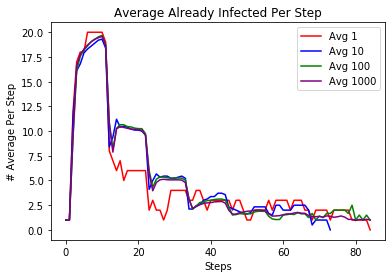

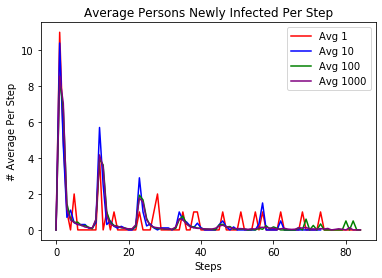

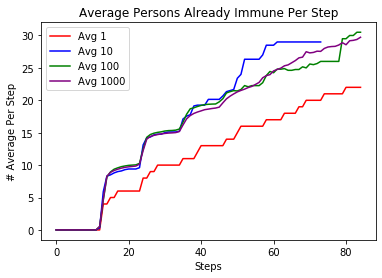

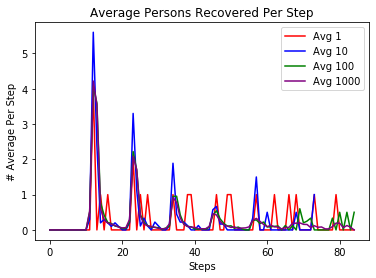

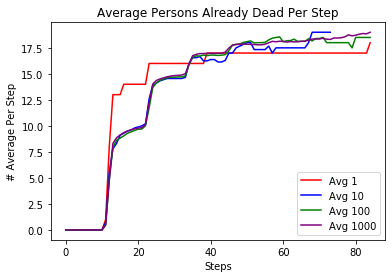

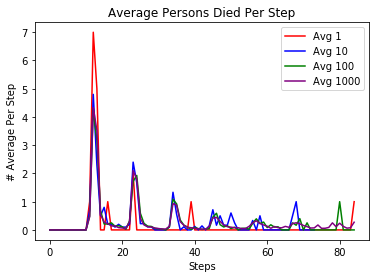

In [17]:
ax = plt.gca()
plt.title('Average Already Infected Per Step')
plt.xlabel('Steps')
plt.ylabel('# Average Per Step')
partCAlreadyInfected.plot(kind='line',y='Avg 1',color = 'red',ax=ax)
partCAlreadyInfected.plot(kind='line',y='Avg 10',color = 'blue',ax=ax)
partCAlreadyInfected.plot(kind='line',y='Avg 100',color = 'green',ax=ax)
partCAlreadyInfected.plot(kind='line',y='Avg 1000',color = 'purple',ax=ax)
plt.savefig('partCAlreadyInfected.png', transparent=True)

plt.show()

ax = plt.gca()
plt.title('Average Persons Newly Infected Per Step')
plt.xlabel('Steps')
plt.ylabel('# Average Per Step')
partCGotInfected.plot(kind='line',y='Avg 1',color = 'red', ax = ax)
partCGotInfected.plot(kind ='line',y='Avg 10',color = 'blue',ax = ax)
partCGotInfected.plot(kind='line',y='Avg 100', color='green',ax = ax)
partCGotInfected.plot(kind='line',y='Avg 1000',color = 'purple',ax = ax)
plt.savefig('partCGotInfected.png', transparent=True)
plt.show()

ax = plt.gca()
plt.title('Average Persons Already Immune Per Step')
plt.xlabel('Steps')
plt.ylabel('# Average Per Step')
partCAvgRecovered.plot(kind='line',y='Avg 1',color = 'red', ax = ax)
partCAvgRecovered.plot(kind ='line',y='Avg 10',color = 'blue',ax = ax)
partCAvgRecovered.plot(kind='line',y='Avg 100', color='green',ax = ax)
partCAvgRecovered.plot(kind='line',y='Avg 1000',color = 'purple',ax = ax)
plt.savefig('partCAvgRecovered.png', transparent=True)
plt.show()

ax = plt.gca()
#print(partCAvgRecovered)
plt.title('Average Persons Recovered Per Step')
plt.xlabel('Steps')
plt.ylabel('# Average Per Step')
partCAvgRecoveredStep.plot(kind='line',y='Avg 1',color = 'red',ax=ax)
partCAvgRecoveredStep.plot(kind='line',y='Avg 10',color = 'blue',ax=ax)
partCAvgRecoveredStep.plot(kind='line',y='Avg 100',color = 'green',ax=ax)
partCAvgRecoveredStep.plot(kind='line',y='Avg 1000',color = 'purple',ax=ax)
plt.savefig('partCAvgRecoveredStep.png', transparent=True)
plt.show()

ax = plt.gca()
plt.title('Average Persons Already Dead Per Step')
plt.xlabel('Steps')
plt.ylabel('# Average Per Step')
partCAvgDied.plot(kind='line',y='Avg 1',color = 'red', ax = ax)
partCAvgDied.plot(kind ='line',y='Avg 10',color = 'blue',ax = ax)
partCAvgDied.plot(kind='line',y='Avg 100', color='green',ax = ax)
partCAvgDied.plot(kind='line',y='Avg 1000',color = 'purple',ax = ax)
plt.savefig('partCAvgDied.png', transparent=True)
plt.show()

ax = plt.gca()
plt.title('Average Persons Died Per Step')
plt.xlabel('Steps')
plt.ylabel('# Average Per Step')
partCAvgDeadStep.plot(kind='line',y='Avg 1',color = 'red',ax=ax)
partCAvgDeadStep.plot(kind='line',y='Avg 10',color = 'blue',ax=ax)
partCAvgDeadStep.plot(kind='line',y='Avg 100',color = 'green',ax=ax)
partCAvgDeadStep.plot(kind='line',y='Avg 1000',color = 'purple',ax=ax)
plt.savefig('partCAvgDeadStep.png', transparent=True)
plt.show()

In [18]:
#--------------------------PART D ----------------------------
resetDfs()

#print("Part D")
#print()
steps=20
deathchance=10
recoverychance=90
infectionRadius=1
SocDist = 15
resilience = 50

partDGotInfected = pd.DataFrame()
partDAlreadyInfected = pd.DataFrame()
partDAvgRecovered = pd.DataFrame()
partDAvgDied = pd.DataFrame()
partDAvgDeadStep = pd.DataFrame()
partDAvgRecoveredStep = pd.DataFrame()

for i in range(1):
    runSim(2,totalAvgNewInfected,totalAvgAlreadyInfected,totalAvgRecover,totalAvgDie,totDeadPerStep,totRecoverPerStep,deathchance,recoverychance)

tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
tempDF3 = pd.DataFrame(totalAvgRecover)
tempDF4 = pd.DataFrame(totalAvgDie)
tempDF5 = pd.DataFrame(totDeadPerStep)
tempDF6 = pd.DataFrame(totRecoverPerStep)
partDGotInfected["Avg 1"] = tempDF2.mean(axis = 0)
partDAlreadyInfected["Avg 1"] = tempDF.mean(axis = 0)
partDAvgRecovered["Avg 1"] = tempDF3.mean(axis=0)
partDAvgDied["Avg 1"] = tempDF4.mean(axis=0)
partDAvgDeadStep["Avg 1"] = tempDF5.mean(axis=0)
partDAvgRecoveredStep["Avg 1"] = tempDF6.mean(axis=0)

resetDfs()
for i in range(10):
    runSim(2,totalAvgNewInfected,totalAvgAlreadyInfected,totalAvgRecover,totalAvgDie,totDeadPerStep,totRecoverPerStep,deathchance,recoverychance)

tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
tempDF3 = pd.DataFrame(totalAvgRecover)
tempDF4 = pd.DataFrame(totalAvgDie)
tempDF5 = pd.DataFrame(totDeadPerStep)
tempDF6 = pd.DataFrame(totRecoverPerStep)
partDGotInfected["Avg 10"] = tempDF2.mean(axis = 0)
partDAlreadyInfected["Avg 10"] = tempDF.mean(axis = 0)
partDAvgRecovered["Avg 10"] = tempDF3.mean(axis=0)
partDAvgDied["Avg 10"] = tempDF4.mean(axis=0)
partDAvgDeadStep["Avg 10"] = tempDF5.mean(axis=0)
partDAvgRecoveredStep["Avg 10"] = tempDF6.mean(axis=0)

resetDfs()
for i in range(100):
    runSim(2,totalAvgNewInfected,totalAvgAlreadyInfected,totalAvgRecover,totalAvgDie,totDeadPerStep,totRecoverPerStep,deathchance,recoverychance)

tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
tempDF3 = pd.DataFrame(totalAvgRecover)
tempDF4 = pd.DataFrame(totalAvgDie)
tempDF5 = pd.DataFrame(totDeadPerStep)
tempDF6 = pd.DataFrame(totRecoverPerStep)
partDGotInfected["Avg 100"] = tempDF2.mean(axis = 0)
partDAlreadyInfected["Avg 100"] = tempDF.mean(axis = 0)
partDAvgRecovered["Avg 100"] = tempDF3.mean(axis=0)
partDAvgDied["Avg 100"] = tempDF4.mean(axis=0)
partDAvgDeadStep["Avg 100"] = tempDF5.mean(axis=0)
partDAvgRecoveredStep["Avg 100"] = tempDF6.mean(axis=0)



resetDfs() 
for i in range(1000):
    runSim(2,totalAvgNewInfected,totalAvgAlreadyInfected,totalAvgRecover,totalAvgDie,totDeadPerStep,totRecoverPerStep,deathchance,recoverychance)

tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
tempDF = pd.DataFrame(totalAvgAlreadyInfected)
tempDF2 = pd.DataFrame(totalAvgNewInfected)
tempDF3 = pd.DataFrame(totalAvgRecover)
tempDF4 = pd.DataFrame(totalAvgDie)
tempDF5 = pd.DataFrame(totDeadPerStep)
tempDF6 = pd.DataFrame(totRecoverPerStep)
partDGotInfected["Avg 1000"] = tempDF2.mean(axis = 0)
partDAlreadyInfected["Avg 1000"] = tempDF.mean(axis = 0)
partDAvgRecovered["Avg 1000"] = tempDF3.mean(axis=0)
partDAvgDied["Avg 1000"] = tempDF4.mean(axis=0)
partDAvgDeadStep["Avg 1000"] = tempDF5.mean(axis=0)
partDAvgRecoveredStep["Avg 1000"] = tempDF6.mean(axis=0)    

#tempDF = pd.DataFrame()

##print("Got Infected")
#print(partDGotInfected)


##print("Already Infected")
#print()
##print(partDAlreadyInfected)

#Need to fix dataframe or redo AvgDied and AvgRecovered since graph formatting off


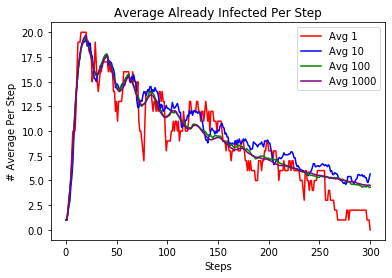

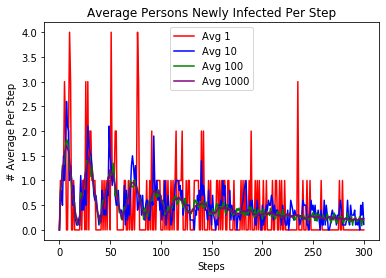

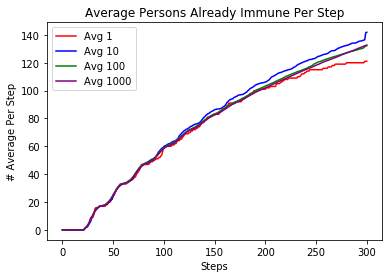

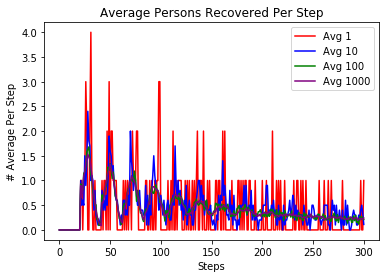

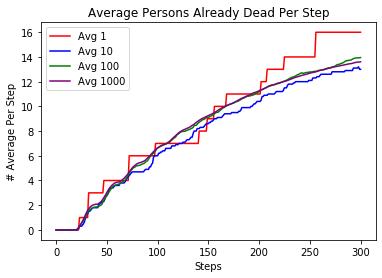

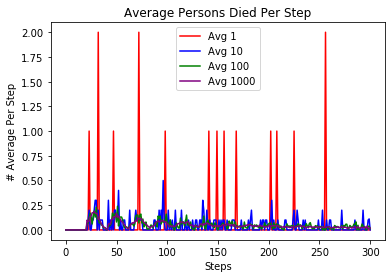

In [19]:
ax = plt.gca()
plt.title('Average Already Infected Per Step')
plt.xlabel('Steps')
plt.ylabel('# Average Per Step')
partDAlreadyInfected.plot(kind='line',y='Avg 1',color = 'red',ax=ax)
partDAlreadyInfected.plot(kind='line',y='Avg 10',color = 'blue',ax=ax)
partDAlreadyInfected.plot(kind='line',y='Avg 100',color = 'green',ax=ax)
partDAlreadyInfected.plot(kind='line',y='Avg 1000',color = 'purple',ax=ax)
plt.savefig('partDAlreadyInfected.png', transparent=True)

plt.show()

ax = plt.gca()
plt.title('Average Persons Newly Infected Per Step')
plt.xlabel('Steps')
plt.ylabel('# Average Per Step')
partDGotInfected.plot(kind='line',y='Avg 1',color = 'red', ax = ax)
partDGotInfected.plot(kind ='line',y='Avg 10',color = 'blue',ax = ax)
partDGotInfected.plot(kind='line',y='Avg 100', color='green',ax = ax)
partDGotInfected.plot(kind='line',y='Avg 1000',color = 'purple',ax = ax)
plt.savefig('partDGotInfected.png', transparent=True)
plt.show()

ax = plt.gca()
plt.title('Average Persons Already Immune Per Step')
plt.xlabel('Steps')
plt.ylabel('# Average Per Step')
partDAvgRecovered.plot(kind='line',y='Avg 1',color = 'red', ax = ax)
partDAvgRecovered.plot(kind ='line',y='Avg 10',color = 'blue',ax = ax)
partDAvgRecovered.plot(kind='line',y='Avg 100', color='green',ax = ax)
partDAvgRecovered.plot(kind='line',y='Avg 1000',color = 'purple',ax = ax)
plt.savefig('partDAvgRecovered.png', transparent=True)
plt.show()

ax = plt.gca()
#print(partDAvgRecovered)
plt.title('Average Persons Recovered Per Step')
plt.xlabel('Steps')
plt.ylabel('# Average Per Step')
partDAvgRecoveredStep.plot(kind='line',y='Avg 1',color = 'red',ax=ax)
partDAvgRecoveredStep.plot(kind='line',y='Avg 10',color = 'blue',ax=ax)
partDAvgRecoveredStep.plot(kind='line',y='Avg 100',color = 'green',ax=ax)
partDAvgRecoveredStep.plot(kind='line',y='Avg 1000',color = 'purple',ax=ax)
plt.savefig('partDAvgRecoveredStep.png', transparent=True)
plt.show()

ax = plt.gca()
plt.title('Average Persons Already Dead Per Step')
plt.xlabel('Steps')
plt.ylabel('# Average Per Step')
partDAvgDied.plot(kind='line',y='Avg 1',color = 'red', ax = ax)
partDAvgDied.plot(kind ='line',y='Avg 10',color = 'blue',ax = ax)
partDAvgDied.plot(kind='line',y='Avg 100', color='green',ax = ax)
partDAvgDied.plot(kind='line',y='Avg 1000',color = 'purple',ax = ax)
plt.savefig('partDAvgDied.png', transparent=True)
plt.show()

ax = plt.gca()
plt.title('Average Persons Died Per Step')
plt.xlabel('Steps')
plt.ylabel('# Average Per Step')
partDAvgDeadStep.plot(kind='line',y='Avg 1',color = 'red',ax=ax)
partDAvgDeadStep.plot(kind='line',y='Avg 10',color = 'blue',ax=ax)
partDAvgDeadStep.plot(kind='line',y='Avg 100',color = 'green',ax=ax)
partDAvgDeadStep.plot(kind='line',y='Avg 1000',color = 'purple',ax=ax)
plt.savefig('partDAvgDeadStep.png', transparent=True)
plt.show()